In [343]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Polygon

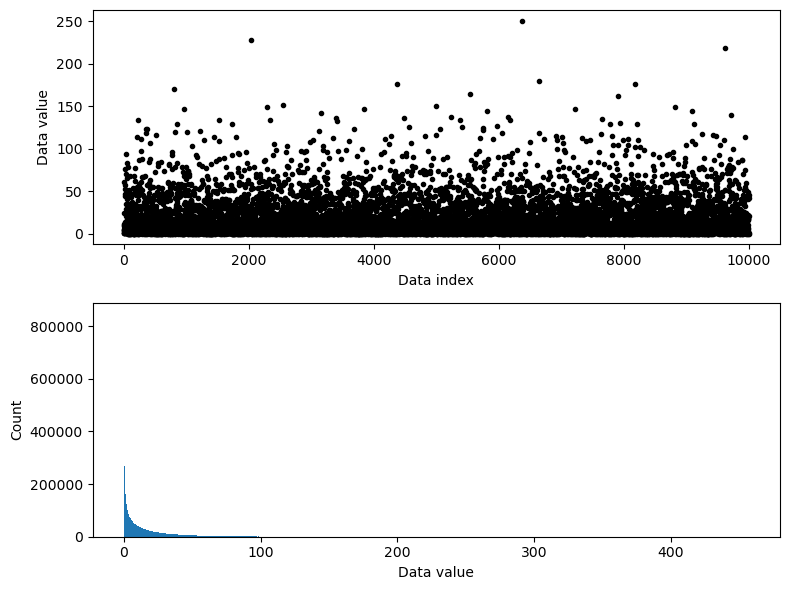

In [344]:
pop_n = int(1e7)
population = (4 * np.random.randn(pop_n)) ** 2
pop_mean = np.mean(population)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].plot(population[::1000], 'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population, bins='fd')
ax[1].set_xlabel('Data value')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

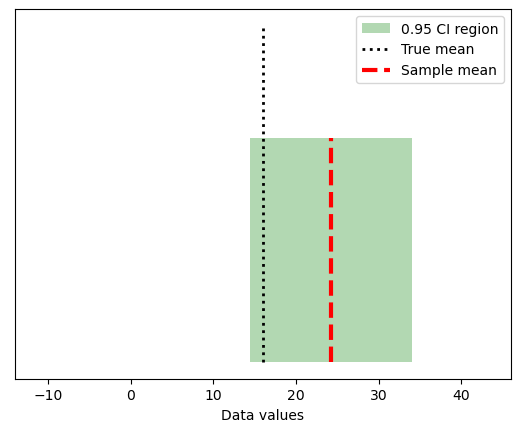

In [353]:
sample_size = 40
confidence = 0.95

rand_sample = np.random.randint(0, pop_n, sample_size)
sample_mean = np.mean(population[rand_sample])
sample_std = np.std(population[rand_sample], ddof=1)

ci_tmp = (1 - confidence) / 2
conf_int = sample_mean + stats.t.ppf([ci_tmp, 1 - ci_tmp], sample_size - 1) * (sample_std / np.sqrt(sample_size))

fig, ax = plt.subplots(1, 1)

y = np.array([[conf_int[0], 0], [conf_int[1], 0], [conf_int[1], 1], [conf_int[0], 1]])
p = Polygon(y, facecolor='g', alpha=0.3)
ax.add_patch(p)

ax.plot([pop_mean, pop_mean], [0, 1.5], 'k:', linewidth=2)
ax.plot([sample_mean, sample_mean], [0, 1], 'r--', linewidth=3)
ax.set_xlim([pop_mean - 30, pop_mean + 30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend([f'{confidence} CI region', 'True mean', 'Sample mean'])

plt.show()

In [346]:
sample_size = 50
confidence = 0.95
num_experiments = 5000
within_ci = np.ones(num_experiments)

ci_tmp = (1 - confidence) / 2
ci_t = stats.t.ppf([ci_tmp, 1 - ci_tmp], sample_size - 1)
sqrt_n = np.sqrt(sample_size)
    
for i in range(num_experiments):
    
    rand_sample = population[np.random.randint(0, pop_n, sample_size)]
    sample_mean = np.mean(rand_sample)
    sample_std = np.std(rand_sample, ddof=1)
    
    conf_int = sample_mean + ci_t * (sample_std / sqrt_n)
    
    within_ci[i] = pop_mean > conf_int[0] and pop_mean < conf_int[1]

print(f'{np.mean(within_ci)} of sample C.I.\'s contained the true population mean.')

0.9202 of sample C.I.'s contained the true population mean.
